In [25]:
#Create an institutions df with all the columns (top N concepts one-hot encoded)

import pandas as pd
#read institutions csv into pandas dataframe
df_inst=pd.read_csv('data/processed/institutions_strict.csv')
print(df_inst.head())

                    institution_id                  institution_name  \
0   https://openalex.org/I98358874    Delft University of Technology   
1   https://openalex.org/I62916508    Technical University of Munich   
2  https://openalex.org/I913481162  Wageningen University & Research   
3  https://openalex.org/I153648349           University of Leicester   
4   https://openalex.org/I47508984           Imperial College London   

  country_code       type  works_count  citations_sum  oa_share  \
0           NL  education            7          12730      91.7   
1           DE  education            6          17625     100.0   
2           NL  education            5            698     100.0   
3           GB  education            5           2654     100.0   
4           GB  education            5           2361      83.3   

   collaboration_rate  multi_country_rate  pubs_2020  pubs_2021  pubs_2022  \
0                58.3                50.0          1          3          0   
1       

In [26]:
#removing unnecessary columns from the df_inst (institution_id,institution_name,country_code,type,works_count,top_5_sources)
#works_count is removed because it is represented in the other columns (pubs_2020 +)
#keeping all necessary columns

df_inst_all=df_inst[['citations_sum','oa_share','collaboration_rate','multi_country_rate','pubs_2020','pubs_2021','pubs_2022','pubs_2023','pubs_2024']]
print(df_inst_all.head())

   citations_sum  oa_share  collaboration_rate  multi_country_rate  pubs_2020  \
0          12730      91.7                58.3                50.0          1   
1          17625     100.0                69.0                69.0          1   
2            698     100.0                83.3                83.3          0   
3           2654     100.0               100.0               100.0          2   
4           2361      83.3               100.0               100.0          2   

   pubs_2021  pubs_2022  pubs_2023  pubs_2024  
0          3          0          2          1  
1          3          0          2          0  
2          1          3          1          0  
3          1          2          0          0  
4          2          0          1          0  


In [27]:
#Counting the number of unique concepts
unique_concepts = set()

for concepts_str in df_inst['top_5_concepts'].dropna():
    for item in str(concepts_str).split(';'):
        item = item.strip()
        if '(' in item:
            concept = item.split('(')[0].strip().lower()
            unique_concepts.add(concept)
            
concepts_list = sorted(list(unique_concepts))

#Number of Unique concepts
concepts_list = sorted(list(unique_concepts))
print(f"Unique concepts: {len(concepts_list)}")
print(f"Concepts: {unique_concepts}")
#N=351

Unique concepts: 351
Concepts: {'usable', 'interpretability', 'equivariant map', 'reinforcement learning', 'phishing', 'photonics', 'neural dynamics and brain function', 'event', 'popularity', 'applications of artificial intelligence', 'pattern recognition', 'early warning system', 'asymmetry', 'heuristics', 'revenue', 'perception', 'metaheuristic optimization algorithms research', 'adversarial system', 'energy consumption', 'deep neural networks', 'transferability', 'public sector', 'theory of computation', 'productivity', 'quantum', 'quantum network', 'distributed generation', 'trustworthiness', 'perspective', 'economics education', 'plastic waste', 'inclusion', 'safer', 'blueprint', 'stakeholder', 'ethical issues', 'limiting', 'software deployment', 'robotics', 'tool wear', 'industrial vision systems and defect detection', 'sonar', 'cognitive psychology', 'variable', 'perturbation', 'particle swarm optimization', 'implementation', 'generalization', 'time series', 'spiking neural net

In [ ]:
#one-hot encoding of the column top concepts(N=351)

def extract_concepts_for_row(text):
    concepts = set()
    if pd.isna(text):
        return concepts
    for item in str(text).split(';'):
        item = item.strip()
        if '(' in item:
            concept = item.split('(')[0].strip().lower()
            concepts.add(concept)
    return concepts

one_hot_data = []

for idx, row in df_inst.iterrows():
    concepts_in_row = extract_concepts_for_row(row['top_5_concepts'])
    row_data = {concept: 1 if concept in concepts_in_row else 0 
                for concept in concepts_list}
    one_hot_data.append(row_data)

one_hot_df=pd.DataFrame(one_hot_data, index=df_inst.index)

#concatenating the df_inst_all with the one_hot_df
df_inst_all_encoded = pd.concat([df_inst_all, one_hot_df], axis=1)

print(f"Original df shape: {df_inst_all.shape}")
print(f"Encoded df shape: {df_inst_all_encoded.shape}")
print(f"Added {len(concepts_list)} one-hot encoded columns")

print(df_inst_all_encoded.head())

Original df shape: (579, 9)
Encoded df shape: (579, 360)
Added 351 one-hot encoded columns
   citations_sum  oa_share  collaboration_rate  multi_country_rate  pubs_2020  \
0          12730      91.7                58.3                50.0          1   
1          17625     100.0                69.0                69.0          1   
2            698     100.0                83.3                83.3          0   
3           2654     100.0               100.0               100.0          2   
4           2361      83.3               100.0               100.0          2   

   pubs_2021  pubs_2022  pubs_2023  pubs_2024  2019-20 coronavirus outbreak  \
0          3          0          2          1                             0   
1          3          0          2          0                             0   
2          1          3          1          0                             0   
3          1          2          0          0                             0   
4          2          0    

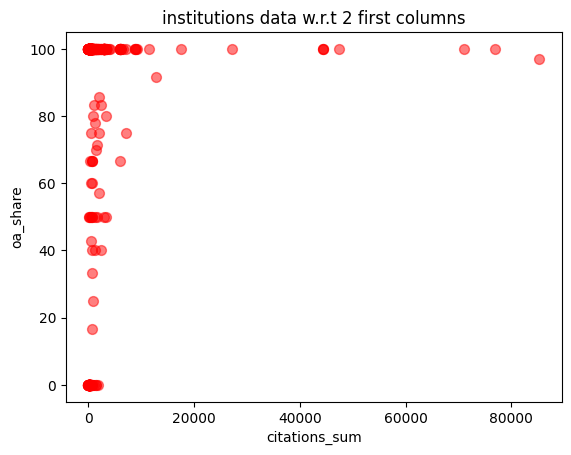

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(df_inst_all_encoded.iloc[:, 0], df_inst_all_encoded.iloc[:, 1], c='r', s=50, alpha=0.5)
plt.xlabel('citations_sum')
plt.ylabel('oa_share')
plt.title('institutions data w.r.t citations_sum and oa_share')
plt.show()

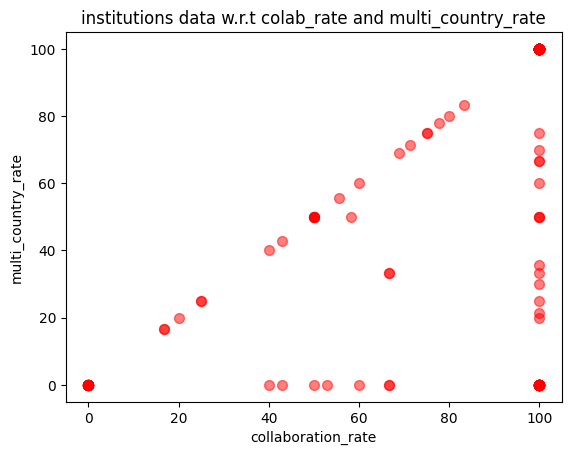

In [31]:
import matplotlib.pyplot as plt


plt.scatter(df_inst_all_encoded.iloc[:, 2], df_inst_all_encoded.iloc[:, 3], c='r', s=50, alpha=0.5)
plt.xlabel('collaboration_rate')
plt.ylabel('multi_country_rate')
plt.title('institutions data w.r.t colab_rate and multi_country_rate')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_inst_all_encoded = scaler.fit_transform(df_inst_all_encoded)
X_inst_all_encoded

array([[ 1.60651983,  0.28223991, -1.59136189, ..., -0.04159452,
        -0.04159452, -0.09333167],
       [ 2.31401803,  0.50456856, -1.10804616, ..., -0.04159452,
        -0.04159452, -0.09333167],
       [-0.13252375,  0.50456856, -0.46211952, ..., -0.04159452,
        -0.04159452, -0.09333167],
       ...,
       [-0.21996735,  0.50456856,  0.29221438, ..., -0.04159452,
        -0.04159452, -0.09333167],
       [-0.19106037, -2.17408979,  0.29221438, ..., -0.04159452,
        -0.04159452, -0.09333167],
       [ 0.62223735,  0.50456856,  0.29221438, ..., -0.04159452,
        -0.04159452, -0.09333167]])

In [ ]:
#Apply Principal component analysis to the standardized data

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA, generate 2 PCs
pca = PCA(n_components=2)

# Transform data with the 2 generated PCs
X_pca = pca.fit_transform(X_inst_all_encoded)
X_pca

array([[-0.29240571,  0.18790306],
       [-1.44946778,  0.19693638],
       [-1.47567681, -0.39939959],
       ...,
       [ 0.34714595, -0.83286187],
       [-0.99262913, -0.08631154],
       [ 6.74016342, -0.37775495]])

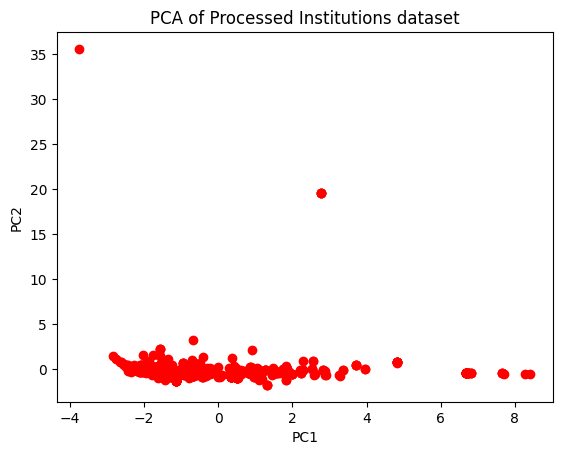

In [38]:
plt.scatter(X_pca[:,0], X_pca[:,1],c='r')
plt.title('PCA of Processed Institutions dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Text(0.5, 1.0, 'Elbow Method: Finding Optimal K')

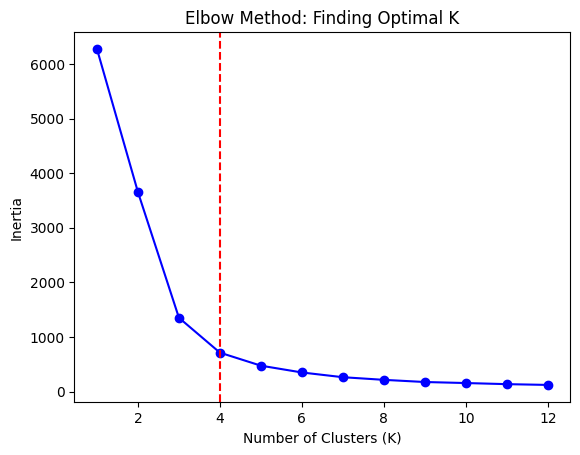

In [41]:
#Clustering of PCA data 

#Elbow procedure

from sklearn.cluster import KMeans

# Finding the best K using the Elbow Method

# Inertia: within-cluster sum of squares (WCSS)
inertias = []
K_range = range(1, 13)

# Elbow point: where the curve's slope changes sharply from steep to shallow
# Adding more clusters beyond this point provides significantly less improvement in terms of reducing the WCSS.

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=4, color='red', linestyle='--', label='Elbow at K=4')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Finding Optimal K')

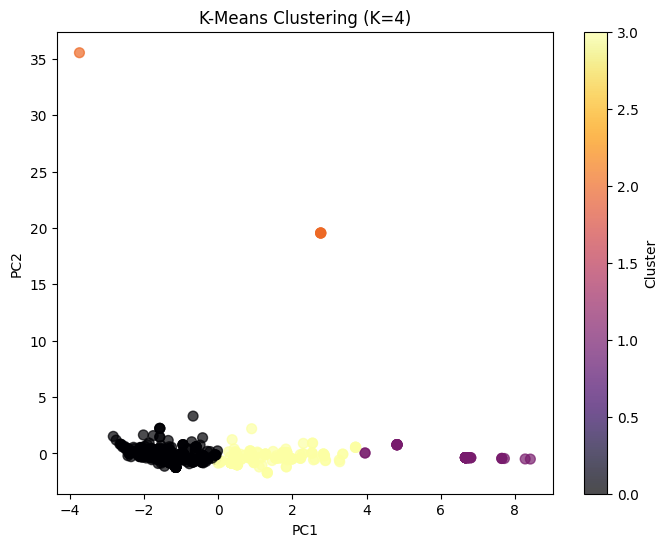

In [43]:
# Apply K-Means to PCA data with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='inferno', s=50, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (K=4)')
plt.colorbar(label='Cluster')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

print('Silhouette score: ', silhouette_score(X_pca,kmeans_labels))

Silhouette score:  0.6119684077415567


Text(0.5, 1.0, 'Elbow Method: Finding Optimal K')

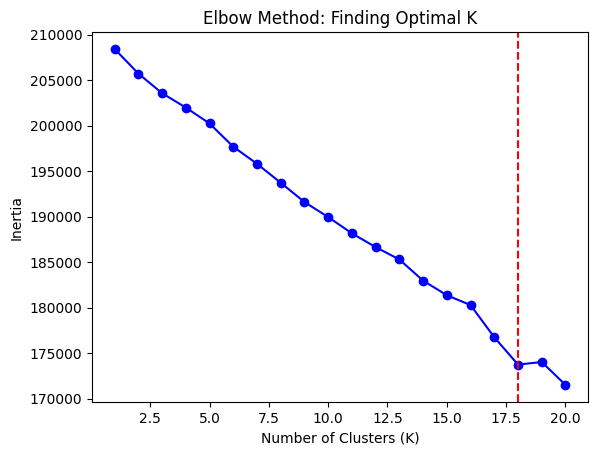

In [ ]:
#Clustering of Insitutions data (without PCA)

#Elbow procedure

from sklearn.cluster import KMeans

# Finding the best K using the Elbow Method

# Inertia: within-cluster sum of squares (WCSS)
inertias = []
K_range = range(1,21)

# Elbow point: where the curve's slope changes sharply from steep to shallow
# Adding more clusters beyond this point provides significantly less improvement in terms of reducing the WCSS.

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_inst_all_encoded)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=18, color='red', linestyle='--', label='Elbow at K=18')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Finding Optimal K')

#Elbow point did not appear within a range of 100 clusters (The plot remained steep)
#Another method of clustering should be applied to the institutions dataset(without pca) instead of K-Means
#Note that we simulated the elbow point as 18, so we applied 18 clusters to the data just for purpose of simulation

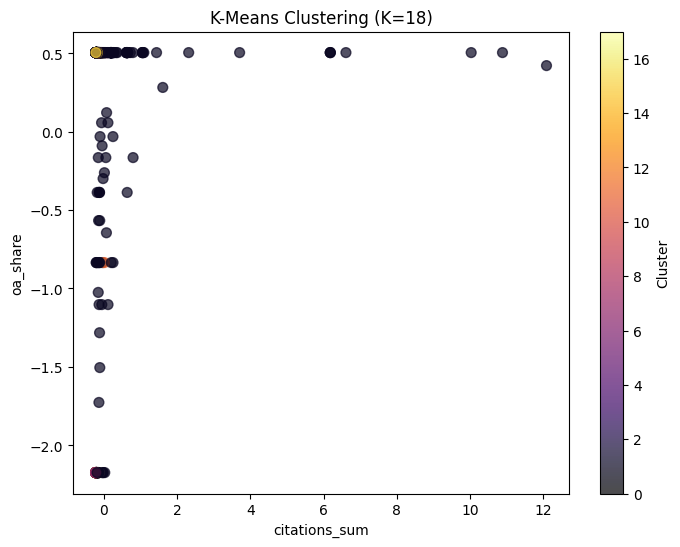

In [51]:
# Apply K-Means to Institutions data(without PCA) with K=18
kmeans = KMeans(n_clusters=18, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_inst_all_encoded)
kmeans_labels
plt.figure(figsize=(8, 6))
plt.scatter(X_inst_all_encoded[:, 0], X_inst_all_encoded[:, 1], c=kmeans_labels, cmap='inferno', s=50, alpha=0.7)
plt.xlabel('citations_sum')
plt.ylabel('oa_share')
plt.title('K-Means Clustering (K=18)')
plt.colorbar(label='Cluster')
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

print('Silhouette score: ', silhouette_score(X_inst_all_encoded,kmeans_labels))

Silhouette score:  -0.051833565921436904


Hiearchical Clustering


In [56]:
# Create dendrogram
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# randomly choose 100 samples from the dataset
subset_idx = np.random.choice(len(X_pca), 100, replace=False)

#Compute the linkage between all of the different points.
# use a simple euclidean distance measure and Ward's linkage, which seeks to minimize the variance between clusters.
Z = linkage(X_pca[subset_idx], method='ward', metric='euclidean')

Z
# At the i-th iteration, clusters with indices linkage_data[i, 0] and linkage_data[i, 1] are combined to form a cluster
# Z[i, 2]: the distance between clusters Z[i, 0] and Z[i, 1] is given by
# Z[i, 3]: represents the number of original observations in the newly formed cluster.

array([[2.00000000e+00, 1.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+01, 6.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.40000000e+01, 9.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.70000000e+01, 3.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.70000000e+01, 1.03000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.80000000e+01, 2.60000000e+01, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+00, 4.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.40000000e+01, 7.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.90000000e+01, 1.07000000e+02, 0.00000000e+00, 3.00000000e+00],
       [7.80000000e+01, 8.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [5.30000000e+01, 6.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [8.60000000e+01, 1.10000000e+02, 0.00000000e+00, 3.00000000e+00],
       [9.60000000e+01, 1.11000000e+02, 0.00000000e+00, 4.00000000e+00],
       [7.40000000e+01, 8.90000000e+01, 0.00000000e

Text(0.5, 1.0, 'Dendrogram (100 samples)')

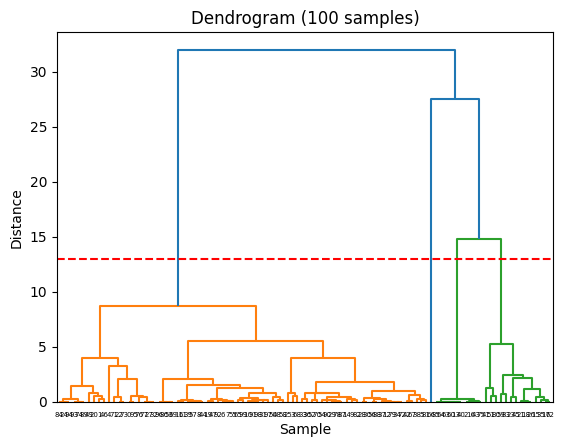

In [60]:
# Plot the hierarchical clustering as a dendrogram.

dendrogram(Z, leaf_rotation=0)
plt.axhline(y=13, color='red', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Dendrogram (100 samples)')

# The two legs of the U-link indicate which clusters were merged.
# The length of the two legs of the U-link represents the distance between the child clusters.

Silhouette Score: 0.6079446877494881


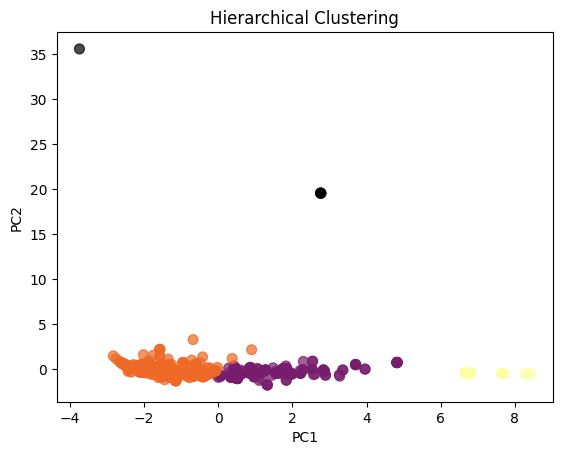

In [61]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hier_labels = hierarchical.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='inferno', s=50, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')

print('Silhouette Score:', silhouette_score(X_pca, hier_labels))

In [62]:
# Create dendrogram
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# randomly choose 100 samples from the dataset
subset_idx = np.random.choice(len(X_inst_all_encoded), 100, replace=False)

#Compute the linkage between all of the different points.
# use a simple euclidean distance measure and Ward's linkage, which seeks to minimize the variance between clusters.
Z2 = linkage(X_inst_all_encoded[subset_idx], method='ward', metric='euclidean')

Z2
# At the i-th iteration, clusters with indices linkage_data[i, 0] and linkage_data[i, 1] are combined to form a cluster
# Z[i, 2]: the distance between clusters Z[i, 0] and Z[i, 1] is given by
# Z[i, 3]: represents the number of original observations in the newly formed cluster.

array([[8.00000000e+00, 2.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.30000000e+01, 9.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.60000000e+01, 8.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [9.30000000e+01, 1.02000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.80000000e+01, 3.10000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.10000000e+01, 1.04000000e+02, 0.00000000e+00, 3.00000000e+00],
       [8.00000000e+01, 1.05000000e+02, 0.00000000e+00, 4.00000000e+00],
       [1.00000000e+01, 5.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [8.90000000e+01, 1.07000000e+02, 0.00000000e+00, 3.00000000e+00],
       [5.40000000e+01, 8.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.00000000e+00, 5.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.80000000e+01, 1.10000000e+02, 0.00000000e+00, 3.00000000e+00],
       [5.10000000e+01, 9.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 6.30000000e+01, 0.00000000e

Text(0.5, 1.0, 'Dendrogram (100 samples)')

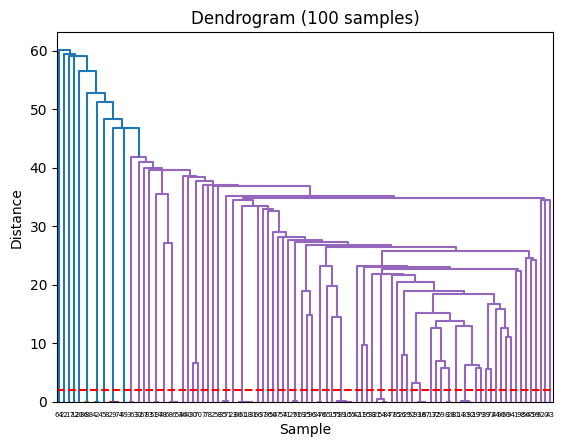

In [66]:
# Plot the hierarchical clustering as a dendrogram.

dendrogram(Z2, leaf_rotation=0)
plt.axhline(y=2, color='red', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Dendrogram (100 samples)')

# The two legs of the U-link indicate which clusters were merged.
# The length of the two legs of the U-link represents the distance between the child clusters.

# A short conclusion: 
We need to cut the dendrogram at the very bottom because we have many high vertical jumps starting from 
distance -2. 
So we can conclude that we ned to clusterize the institution data (without PCA) to approximately 80 clusters 
if we cut at that distance as it can be seen in the dendrogram.
Contrastly, in the previous dendrogram created from the institution data(with PCA), we got just 4 clusters cutting
at distance -3, which shows that PCA was very useful and beneficial for our institution data; note that we transformed our feature space from 350 dimensions (one hot-encoding for the column top 5 concepts) to 2 Principal components dimensional space.
By doing so, and plotting both the elbow graph and dendrogram, both of these plots demonstrated that we need to consider 4 clusters for the data. And it is exactly what we did at the next step and it's shown in the plots.
So the final conclusion, is that PCA was crucial for this institution data, otherwise we will have to make 80 clusters or more which is not feasible.
We will Consider a backward feature selection process for our dimensional feature space to note the changes we get in the respective elbow (k-means) and dendrogram(hieararchical) methods, and see whether we can do a reasonable number of clusters just by applying raw institution data (without PCA).